# Exercise 4
Benfords law

First we get a list of physical constants, this can be recycled from Week 6's practice session

In [42]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import urllib.request
from urllib.request import urlopen
import numpy as np

# web crawling
link = 'https://en.wikipedia.org/wiki/List_of_physical_constants'
html = urlopen(link).read()
soup = BeautifulSoup(html, "html.parser")

# analizing the soup
# first locating for the table, than the correct rows and than iterating through each row
table = soup.find("table")
table_data = table.find("tbody")
table_rows = table_data.findAll("tr")
table_rows = table_rows[1:-1]

data_fields = []
for table_row in table_rows:
    data_fields.append(table_row.findAll('td')[2])

constants = []
for data_field in data_fields:
    constants.append(data_field.get_text())
    
# many strings have units and similar stuff
constants_cleaned = []
for constant in constants:
    numeric_filter = filter(str.isdigit, constant)
    constant_cleaned = "".join(numeric_filter)
    constants_cleaned.append(constant_cleaned)
    


In [43]:
def first_digits(numbers, factor=1):
    first_digits = []
    for number in numbers:
        number_int = int(number)
        number_int = factor * number_int
        number_str = str(number_int)
        digit = int(number_str[0])
        first_digits.append(digit)
    return first_digits

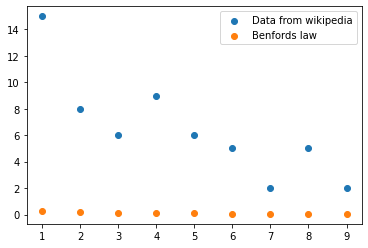

In [50]:
first_digits_int = first_digits(constants_cleaned, factor=5)

first_digits_int = np.array(first_digits_int)
values_str, counts = np.unique(first_digits_int, return_counts=True)

# plotting
d = np.arange(1,10,1)
plt.scatter(values_str, counts, label='Data from wikipedia')
plt.scatter(d, np.log10(1 + 1/d), label='Benfords law')

plt.legend()
# we can look at the plot and can see that it kind of behaves like the law suggests

In [45]:
values_str

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
counts

array([20,  9,  6,  2,  6,  4,  2,  4,  5])